## WEIGHTS ANALYSIS
1. P-value statistics
2. Deviation from 0.5
3. Weight statistics (where can we find maximum weights?)

## WGQA

In [86]:
import pandas as pd

wgqa_df = pd.read_csv("weights_folder/multi_news/multi_news_WGQA.csv")

In [87]:
weights_list = []
weight_df_cols = wgqa_df.columns
for col in weight_df_cols:
    weights_list.append(wgqa_df[col].tolist())

In [88]:
from scipy import stats

# Significance level (adjust as needed)
alpha = 0.05

# Perform one-sample t-test for each group
for i, weights in enumerate(weights_list):
    # Perform one-sample t-test
    t_statistic, p_value = stats.ttest_1samp(weights, 0.5)

    # Print the results
    print(f"EPOCH {i}:")
    print("T-statistic:", t_statistic)
    print("P-value:", p_value)

    # Check the significance
    if p_value < alpha:
        print("Null Hypothesis rejected")
    else:
        print("Can't reject null hypothesis")
    
    print("\n")

EPOCH 0:
T-statistic: -13.469671672612039
P-value: 3.8702917429369397e-36
Null Hypothesis rejected


EPOCH 1:
T-statistic: -13.666837530261637
P-value: 5.046397472788478e-37
Null Hypothesis rejected


EPOCH 2:
T-statistic: -13.186967539177889
P-value: 6.995698271817005e-35
Null Hypothesis rejected




In [89]:
len(wgqa_df)

576

In [90]:
24*24

576

## RANDWGQA

## WMQA

## RANDWMQA

## COLWGQA

In [73]:
colwgqa_df = pd.read_csv("weights_folder/multi_news/multi_news_COLWGQA.csv")

In [74]:
colwgqa_df

,0,1,2
0,0.421506,0.349294,0.379165
1,0.392682,0.418097,0.428585
2,0.361379,0.336551,0.340724
3,0.445153,0.407345,0.432930
4,0.403760,0.382798,0.374083
...,...,...,...
36859,0.516225,0.502748,0.510353
36860,0.450524,0.471607,0.476601
36861,0.504823,0.498961,0.511207
36862,0.537981,0.526390,0.530522


In [75]:
64*12*2*24

36864

In [76]:
weights_list = []
weight_df_cols = colwgqa_df.columns
for col in weight_df_cols:
    weights_list.append(colwgqa_df[col].tolist())

from scipy import stats

# Significance level (adjust as needed)
alpha = 0.05

# Perform one-sample t-test for each group
for i, weights in enumerate(weights_list):
    # Perform one-sample t-test
    t_statistic, p_value = stats.ttest_1samp(weights, 0.5)

    # Print the results
    print(f"EPOCH {i}:")
    print("T-statistic:", t_statistic)
    print("P-value:", p_value)

    # Check the significance
    if p_value < alpha:
        print("Null Hypothesis rejected")
    else:
        print("Can't reject null hypothesis")
    
    print("\n")

EPOCH 0:
T-statistic: -89.48785007670566
P-value: 0.0
Null Hypothesis rejected


EPOCH 1:
T-statistic: -102.42049786250446
P-value: 0.0
Null Hypothesis rejected


EPOCH 2:
T-statistic: -104.53652791280413
P-value: 0.0
Null Hypothesis rejected




## ROWWGQA

## RANDCOLWGQA

## RANDROWWGQA

## COLWMQA

## ROWWMQA

In [26]:
rowwmqa_df = pd.read_csv("weights_folder/multi_news/multi_news_ROWWMQA.csv")
weights_list = []
weight_df_cols = rowwmqa_df.columns
for col in weight_df_cols:
    weights_list.append(rowwmqa_df[col].tolist())

from scipy import stats

# Significance level (adjust as needed)
alpha = 0.1

# Perform one-sample t-test for each group
for i, weights in enumerate(weights_list):
    # Perform one-sample t-test
    t_statistic, p_value = stats.ttest_1samp(weights, 0.5)

    # Print the results
    print(f"EPOCH {i}:")
    print("T-statistic:", t_statistic)
    print("P-value:", p_value)

    # Check the significance
    if p_value < alpha:
        print("Null Hypothesis rejected")
    else:
        print("Can't reject null hypothesis")
    
    print("\n")

EPOCH 0:
T-statistic: -4631.714429154694
P-value: 0.0
Null Hypothesis rejected


EPOCH 1:
T-statistic: -4212.893991098075
P-value: 0.0
Null Hypothesis rejected


EPOCH 2:
T-statistic: -4174.08724371769
P-value: 0.0
Null Hypothesis rejected




In [49]:
len(rowwmqa_df)/768

576.0

In [45]:
768*12*2*24

442368

In [52]:
sublist_length = 768

sublists = [weights_list[0][i:i + sublist_length] for i in range(0, len(weights_list[0]), sublist_length)]

## RANDCOLWMQA

## RANDROWWMQA

In [3]:
from transformers import T5ForConditionalGeneration
t5: T5ForConditionalGeneration = T5ForConditionalGeneration.from_pretrained("t5-base")

/home/athekunal/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [37]:
cross_attention = []
decoder_attention = []
for name,param in t5.named_parameters():
    if name.startswith("decoder"):
        if "EncDecAttention" in name and "q.weight" in name:
            cross_attention.append(name)
        elif "SelfAttention" in name and "q.weight" in name:
            decoder_attention.append(name)

In [41]:
len(cross_attention),len(decoder_attention) 

(12, 12)

In [61]:
cross_attention_key_dict = {str(k):[] for k in range(12)}
cross_attention_value_dict = {str(k):[] for k in range(12)}
decoder_attention_key_dict = {str(k):[] for k in range(12)}
decoder_attention_value_dict = {str(k):[] for k in range(12)}

In [63]:
len(sublists), 12*2*24

(576, 576)

In [64]:
sublist_idx = 0
for name,param in t5.named_parameters():
    if name.startswith("decoder"):
        if "EncDecAttention" in name:
            if "k.weight" in name:
                cross_attention_key_dict[name.split(".")[2]] = sublists[sublist_idx]
                sublist_idx+=1
            elif "v.weight" in name:
                cross_attention_value_dict[name.split(".")[2]] = sublists[sublist_idx]
                sublist_idx+=1
        elif "SelfAttention" in name:
            if "k.weight" in name:
                decoder_attention_key_dict[name.split(".")[2]] = sublists[sublist_idx]
                sublist_idx+=1
            elif "v.weight" in name:
                decoder_attention_value_dict[name.split(".")[2]] = sublists[sublist_idx]
                sublist_idx+=1

In [33]:
import pandas as pd
from scipy import stats

alpha = 0.05
def get_weight_values(curr_weight_list):
    t_statistic, p_value = stats.ttest_1samp(curr_weight_list, 0.5)
    if p_value < alpha:
        rejected = True
    else:
        rejected = False
    return {"weight_list":curr_weight_list,"t_statistic":t_statistic, "p_value":p_value,"null_hypothesis_rejected":rejected}
def get_key_value_dict(weight_path:str,row_or_column:str=""):
    weights_df = pd.read_csv(weight_path)
    weights_list = []
    weight_df_cols = weights_df.columns
    for col in weight_df_cols:
        weights_list.append(weights_df[col].tolist())
    if row_or_column == "col":
        sublist_length = 64*12
    elif row_or_column == "row":
        sublist_length = 768*12
    else:
        sublist_length = 12
    sublists = [weights_list[-1][i:i + sublist_length] for i in range(0, len(weights_list[-1]), sublist_length)]
    cross_attention_key_dict = {str(k):[] for k in range(12)}
    cross_attention_value_dict = {str(k):[] for k in range(12)}
    decoder_attention_key_dict = {str(k):[] for k in range(12)}
    decoder_attention_value_dict = {str(k):[] for k in range(12)}
    sublist_idx = 0
    for name,_ in t5.named_parameters():
        if name.startswith("decoder"):
            if "EncDecAttention" in name:
                if "k.weight" in name:
                    curr_weight_list = sublists[sublist_idx]
                    cross_attention_key_dict[name.split(".")[2]] = get_weight_values(curr_weight_list)
                    sublist_idx+=1
                elif "v.weight" in name:
                    curr_weight_list = sublists[sublist_idx]
                    cross_attention_value_dict[name.split(".")[2]] = get_weight_values(curr_weight_list)
                    sublist_idx+=1
            elif "SelfAttention" in name:
                if "k.weight" in name:
                    curr_weight_list = sublists[sublist_idx]
                    decoder_attention_key_dict[name.split(".")[2]]= get_weight_values(curr_weight_list)
                    sublist_idx+=1
                elif "v.weight" in name:
                    curr_weight_list = sublists[sublist_idx]
                    decoder_attention_value_dict[name.split(".")[2]]=get_weight_values(curr_weight_list)
                    sublist_idx+=1
    return cross_attention_key_dict,cross_attention_value_dict,decoder_attention_key_dict,decoder_attention_value_dict

cross_attention_key_dict,cross_attention_value_dict,decoder_attention_key_dict,decoder_attention_value_dict = get_key_value_dict("weights_folder/multi_news/multi_news_WGQA.csv",'')

In [30]:
cross_attention_key_dict,cross_attention_value_dict,decoder_attention_key_dict,decoder_attention_value_dict = get_key_value_dict("weights_folder/multi_news/multi_news_COLWGQA.csv",'col')

In [41]:
cross_attention_key_dict,cross_attention_value_dict,decoder_attention_key_dict,decoder_attention_value_dict = get_key_value_dict("weights_folder/multi_news/multi_news_ROWWMQA.csv",'row')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


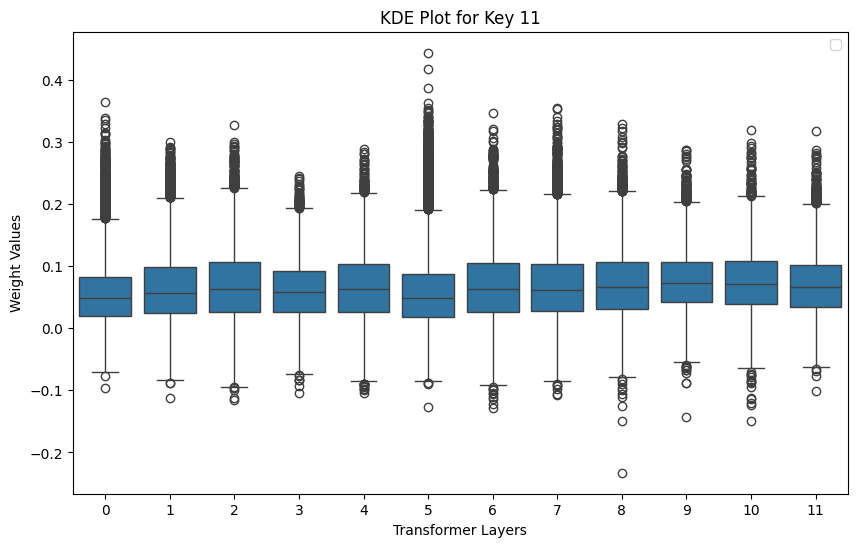

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

data_dict = {int(i):cross_attention_key_dict[i]['weight_list'] for i in cross_attention_key_dict}
# Convert dictionary to DataFrame
data = []
for key, values in data_dict.items():
    for value in values:
        data.append((key, value))

df = pd.DataFrame(data, columns=['Layer Number', 'Weight Values'])

colors = sns.color_palette('colorblind', 12)  # Use a color palette with 12 distinct colors
plt.figure(figsize=(10, 6))  # Set the figure size
# for key in data_dict:
#     sns.kdeplot(data_dict[key], fill=True, color=colors[int(key)], label=f'Key {key}')
sns.boxplot(df,x="Layer Number",y="Weight Values")
plt.title(f'KDE Plot for Key {key}')
plt.xlabel('Transformer Layers')
plt.ylabel('Weight Values')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


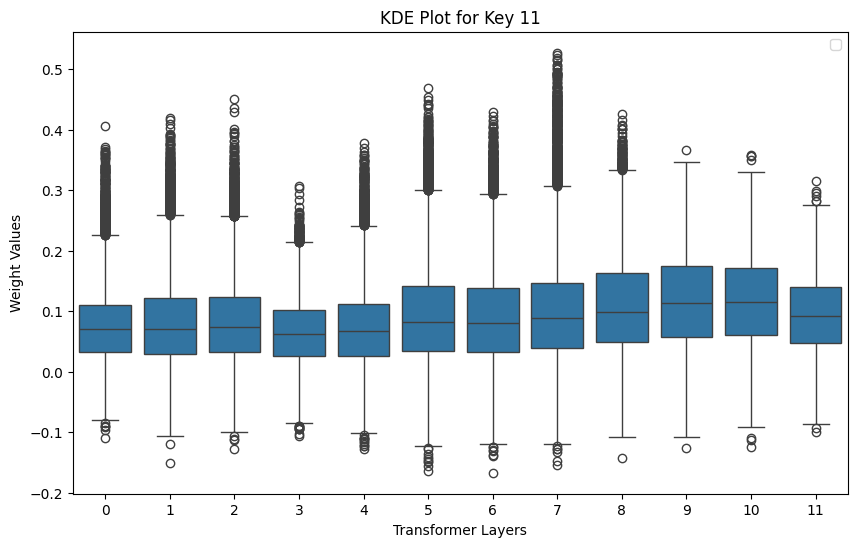

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

data_dict = {int(i):cross_attention_value_dict[i]['weight_list'] for i in cross_attention_value_dict}
# Convert dictionary to DataFrame
data = []
for key, values in data_dict.items():
    for value in values:
        data.append((key, value))

df = pd.DataFrame(data, columns=['Layer Number', 'Weight Values'])

colors = sns.color_palette('colorblind', 12)  # Use a color palette with 12 distinct colors
plt.figure(figsize=(10, 6))  # Set the figure size
# for key in data_dict:
#     sns.kdeplot(data_dict[key], fill=True, color=colors[int(key)], label=f'Key {key}')
sns.boxplot(df,x="Layer Number",y="Weight Values")
plt.title(f'KDE Plot for Key {key}')
plt.xlabel('Transformer Layers')
plt.ylabel('Weight Values')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


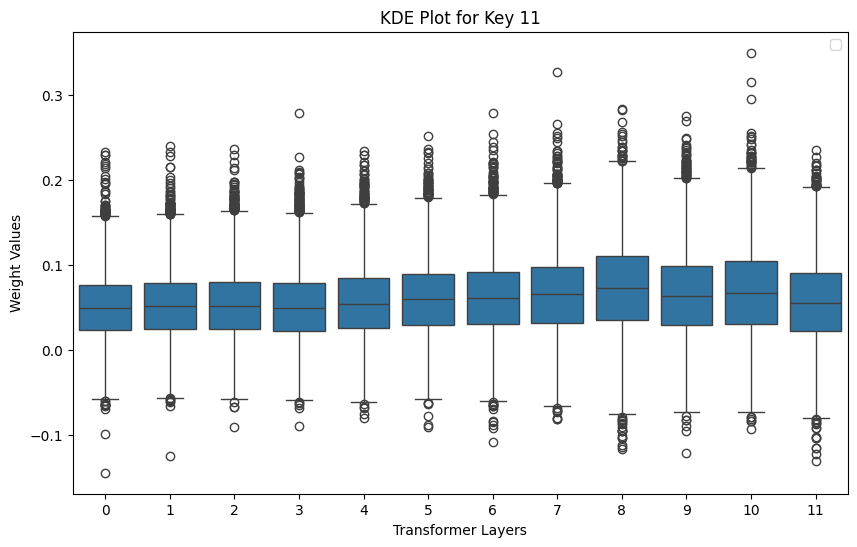

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

data_dict = {int(i):decoder_attention_key_dict[i]['weight_list'] for i in decoder_attention_key_dict}
# Convert dictionary to DataFrame
data = []
for key, values in data_dict.items():
    for value in values:
        data.append((key, value))

df = pd.DataFrame(data, columns=['Layer Number', 'Weight Values'])

colors = sns.color_palette('colorblind', 12)  # Use a color palette with 12 distinct colors
plt.figure(figsize=(10, 6))  # Set the figure size
# for key in data_dict:
#     sns.kdeplot(data_dict[key], fill=True, color=colors[int(key)], label=f'Key {key}')
sns.boxplot(df,x="Layer Number",y="Weight Values")
plt.title(f'KDE Plot for Key {key}')
plt.xlabel('Transformer Layers')
plt.ylabel('Weight Values')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


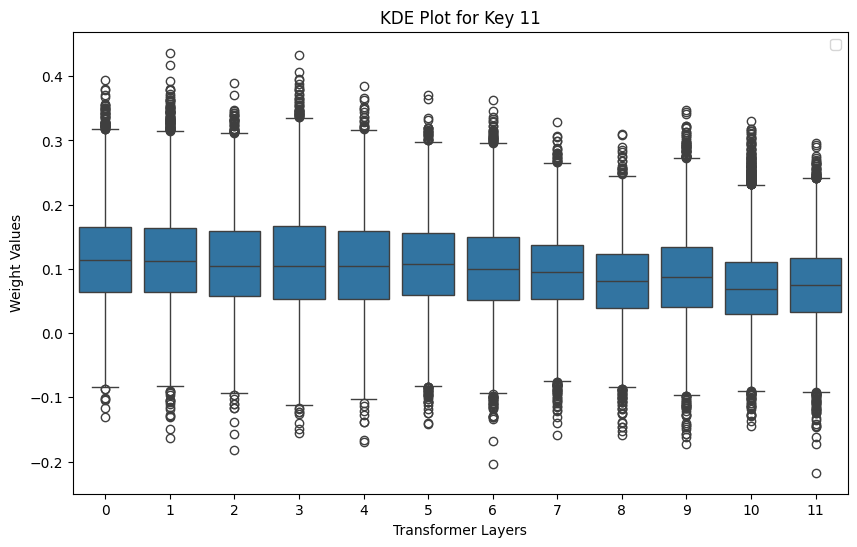

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

data_dict = {int(i):decoder_attention_value_dict[i]['weight_list'] for i in decoder_attention_value_dict}
# Convert dictionary to DataFrame
data = []
for key, values in data_dict.items():
    for value in values:
        data.append((key, value))

df = pd.DataFrame(data, columns=['Layer Number', 'Weight Values'])

colors = sns.color_palette('colorblind', 12)  # Use a color palette with 12 distinct colors
plt.figure(figsize=(10, 6))  # Set the figure size
# for key in data_dict:
#     sns.kdeplot(data_dict[key], fill=True, color=colors[int(key)], label=f'Key {key}')
sns.boxplot(df,x="Layer Number",y="Weight Values")
plt.title(f'KDE Plot for Key {key}')
plt.xlabel('Transformer Layers')
plt.ylabel('Weight Values')
plt.legend()
plt.show()


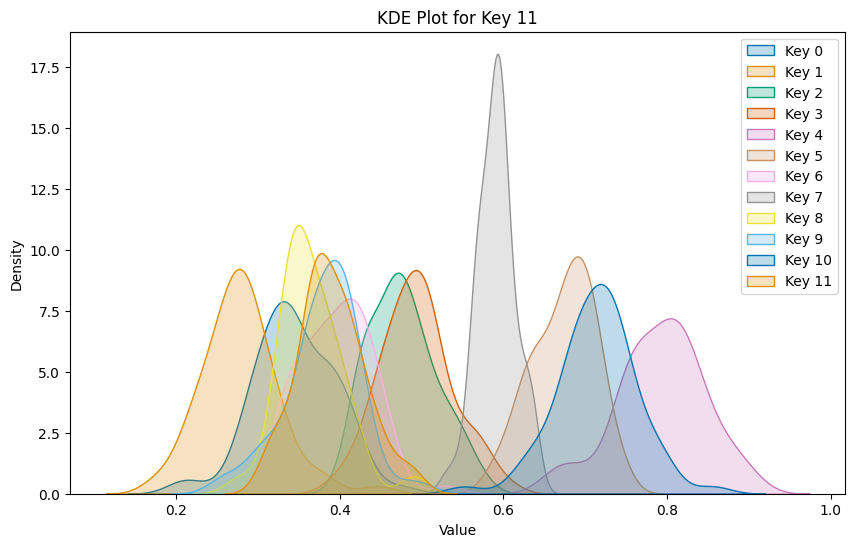

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

data_dict = {i:cross_attention_key_dict[i]['weight_list'] for i in cross_attention_key_dict}
colors = sns.color_palette('colorblind', 12)  # Use a color palette with 12 distinct colors
plt.figure(figsize=(10, 6))  # Set the figure size
for key in data_dict:
    sns.kdeplot(data_dict[key], fill=True, color=colors[int(key)], label=f'Key {key}')
plt.title(f'KDE Plot for Key {key}')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


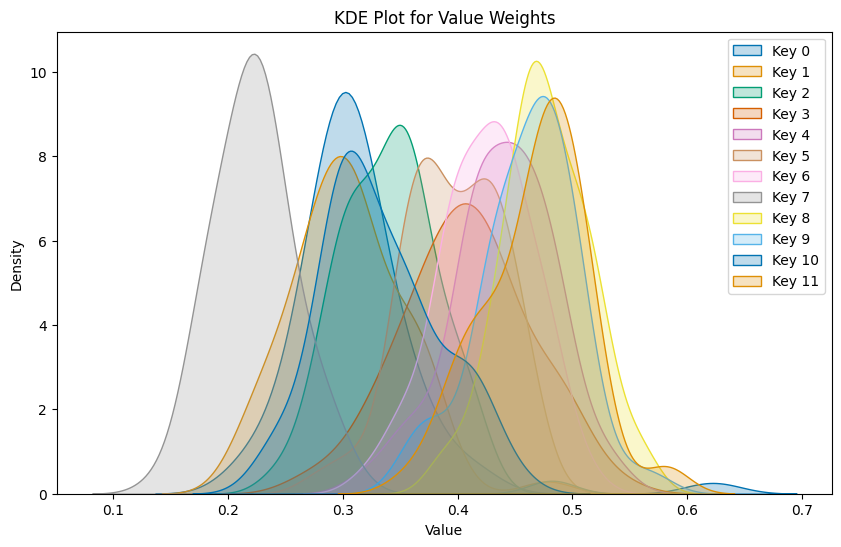

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

data_dict = {i:cross_attention_value_dict[i]['weight_list'] for i in cross_attention_value_dict}
colors = sns.color_palette('colorblind', 12)  # Use a color palette with 12 distinct colors
plt.figure(figsize=(10, 6))  # Set the figure size
for key in data_dict:
    sns.kdeplot(data_dict[key], fill=True, color=colors[int(key)], label=f'Key {key}')
plt.title(f'KDE Plot for Value Weights')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


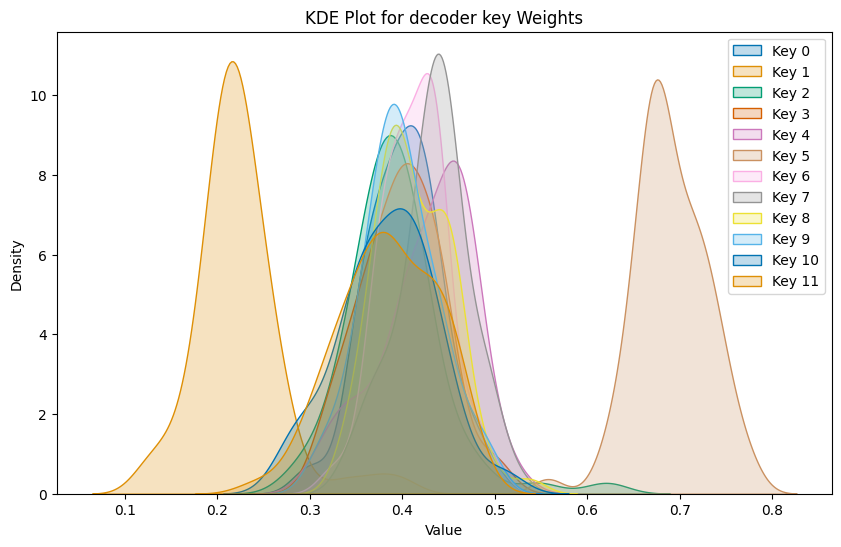

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

data_dict = {i:decoder_attention_key_dict[i]['weight_list'] for i in decoder_attention_key_dict}
colors = sns.color_palette('colorblind', 12)  # Use a color palette with 12 distinct colors
plt.figure(figsize=(10, 6))  # Set the figure size
for key in data_dict:
    sns.kdeplot(data_dict[key], fill=True, color=colors[int(key)], label=f'Key {key}')
plt.title(f'KDE Plot for decoder key Weights')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


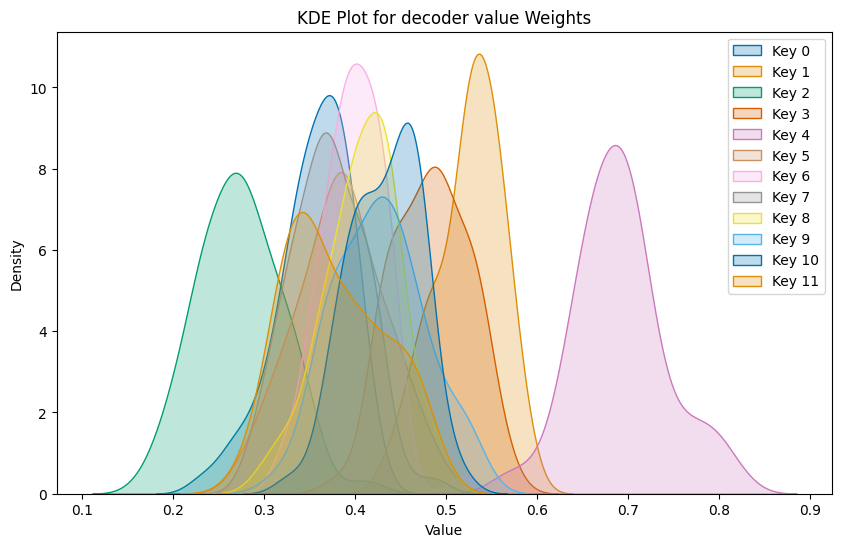

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

data_dict = {i:decoder_attention_value_dict[i]['weight_list'] for i in decoder_attention_value_dict}
colors = sns.color_palette('colorblind', 12)  # Use a color palette with 12 distinct colors
plt.figure(figsize=(10, 6))  # Set the figure size
for key in data_dict:
    sns.kdeplot(data_dict[key], fill=True, color=colors[int(key)], label=f'Key {key}')
plt.title(f'KDE Plot for decoder value Weights')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()
